First few rows of the dataset:
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -0.059357  -0.810759  -1.462912  -0.003486   0.683381   1.065975   
1   1.350408   4.220732   1.564162  -0.047713  -3.378194  -1.173838   
2   1.069958   3.029594  -2.684484   5.316199   0.867742   0.115899   
3  -0.189436   0.240748  -0.685549   0.991412   0.537921  -0.535368   
4  -1.571062  -0.966057  -0.093284  -1.400222  -1.939930   0.698772   

   feature_6  feature_7  feature_8  feature_9  target  
0   0.047220  -0.713335  -0.387791   0.309755       1  
1   1.253721  -1.352617   0.561645   3.055533       1  
2   3.534072   1.674606   1.489776   0.037348       0  
3   0.084447   0.303647  -0.008009  -0.521776       0  
4   0.728243  -1.218458  -1.443351  -0.050100       1  


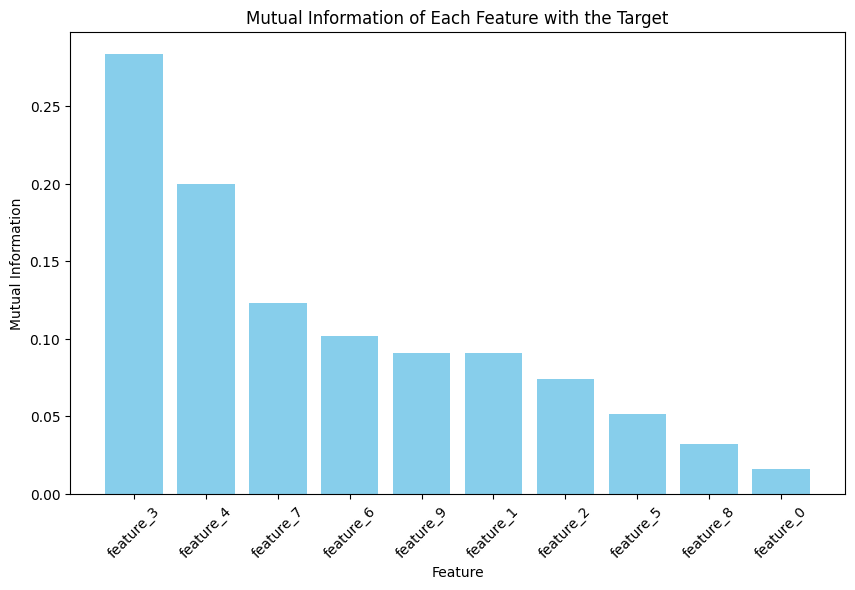

Mutual Information values:
     Feature  Mutual Information
3  feature_3            0.283866
4  feature_4            0.199731
7  feature_7            0.123263
6  feature_6            0.101673
9  feature_9            0.091034
1  feature_1            0.090921
2  feature_2            0.074374
5  feature_5            0.051639
8  feature_8            0.032166
0  feature_0            0.016179
Selected features based on Mutual Information:
3    feature_3
4    feature_4
7    feature_7
6    feature_6
9    feature_9
1    feature_1
2    feature_2
5    feature_5
Name: Feature, dtype: object
First few rows of the dataset with selected features:


,feature_3,feature_4,feature_7,feature_6,feature_9,feature_1,feature_2,feature_5,target
0,-0.003486,0.683381,-0.713335,0.047220,0.309755,-0.810759,-1.462912,1.065975,1
1,-0.047713,-3.378194,-1.352617,1.253721,3.055533,4.220732,1.564162,-1.173838,1
2,5.316199,0.867742,1.674606,3.534072,0.037348,3.029594,-2.684484,0.115899,0
3,0.991412,0.537921,0.303647,0.084447,-0.521776,0.240748,-0.685549,-0.535368,0
4,-1.400222,-1.939930,-1.218458,0.728243,-0.050100,-0.966057,-0.093284,0.698772,1


In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# Step 1: Generate a synthetic dataset
np.random.seed(42)

# Create a dataset with 10 features and a binary target
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)

# Convert to DataFrame for easier handling
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(10)])
df['target'] = y

print("First few rows of the dataset:")
print(df.head())

# Step 2: Calculate Mutual Information
# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

# Calculate mutual information
mi = mutual_info_classif(X, y, random_state=42)

# Create a DataFrame for visualization
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Plot mutual information for each feature
plt.figure(figsize=(10, 6))
plt.bar(mi_df['Feature'], mi_df['Mutual Information'], color='skyblue')
plt.title('Mutual Information of Each Feature with the Target')
plt.xlabel('Feature')
plt.ylabel('Mutual Information')
plt.xticks(rotation=45)
plt.show()

print("Mutual Information values:")
print(mi_df)

# Step 3: Remove Redundant Features
# Threshold for mutual information (can be adjusted)
threshold = 0.05

# Select features with mutual information above the threshold
selected_features = mi_df[mi_df['Mutual Information'] > threshold]['Feature']

print("Selected features based on Mutual Information:")
print(selected_features)

# Create a new DataFrame with selected features
df_selected = df[selected_features.tolist() + ['target']]

print("First few rows of the dataset with selected features:")
df_selected.head()